In [1]:
import os
import sys
import torch
from timeit import default_timer as timer
from datetime import timedelta

BASE_DIR = os.path.dirname('./')
ROOT_DIR = os.path.dirname(BASE_DIR)
sys.path.append(ROOT_DIR)

import yaml

from lib.common.helpers.dataloader_helper import build_dataset
from lib.common.helpers.model_helper import build_model
from lib.common.helpers.visualization_helper import visualization
from lib.common.helpers.print_helper import PrintHelper

In [2]:
mode = 'val' # test, eval, train
data_config = 'configs/kitti-data.yaml'
config = 'configs/lss.yaml'
from lib.monoLSS.printer import Printer

# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

# load cfg
assert (os.path.exists(data_config))
data_cfg = yaml.load(open(data_config, 'r'), Loader=yaml.Loader)
assert (os.path.exists(config))
cfg = yaml.load(open(config, 'r'), Loader=yaml.Loader)
  
#  build dataloader
dataset = build_dataset(data_cfg['dataset'], mode)

# build model
model = build_model(cfg[cfg['type']])

printHelper = PrintHelper(dataset)
printer = Printer(cfg[cfg['type']], model)


Using device: cuda


In [3]:
idx = 0


3
[['Car', 0, 0, 1.5655435, 613.6005, 182.83522, 726.0178, 286.88675, 1.547844, 1.6392778, 4.1270857, 0.94468623, 1.7843493, 13.168396, 1.6488522, 0.8930364]]
0:00:00.055512


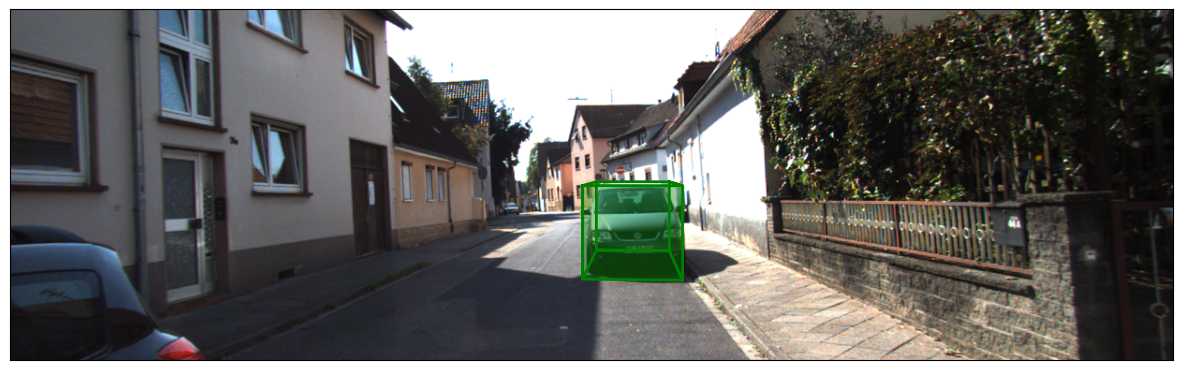

In [7]:
print(idx)

for x in range(1):
    img, calibs = printHelper.getPrintables(idx)
    
    torch.cuda.synchronize() # Wait for all kernels in all streams on a CUDA device to complete.
    start_time = timer()

    preds = printer.print(img, calibs, 0.2)
    print(preds)

    torch.cuda.synchronize() # Wait for all kernels in all streams on a CUDA device to complete.
    end_time = timer()
    print(timedelta(seconds=end_time - start_time))
    
    visualization(img, calibs, preds, True)
    idx = idx +1